# CIFAR Dataset 

In [66]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [67]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(0)

In [68]:
# Checking the version of TensorFLow

tf.__version__

'2.5.0'

# CIFAR 10 DATASET ANALYSIS

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. 

<b>This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the CIFAR homepage.</b>

## The classes are:

Label	and Description : <br><br>
0	airplane<br>
1	automobile<br>
2	bird<br>
3	cat<br>
4	deer<br>
5	dog<br>
6	frog<br>
7	horse<br>
8	ship<br>
9	truck<br>

In [69]:
# Loading the CIFAR Datasets

In [70]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [71]:
# Checking the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


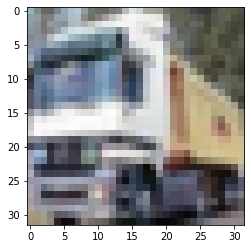

In [72]:
plt.imshow(X_train[1])

In [73]:
X_train.shape

(50000, 32, 32, 3)

In [74]:
y_train[1]

array([9], dtype=uint8)

From above the color image of Truck, it matches with the label of X_train which is 9 as per description from CIFAR Dataset

In [75]:
# Converting RGB to Grayscale (for easier Computation)

In [76]:
X_train1 = np.array(tf.image.rgb_to_grayscale(X_train))
# tf.image.rgb_too_grayscale - converts one or more images from RGB to Grayscale

X_test1 = np.array(tf.image.rgb_to_grayscale(X_test))

In [77]:
X_train1.shape , X_test1.shape

((50000, 32, 32, 1), (10000, 32, 32, 1))

In [78]:
# Reshaping the Image

X_train2 = X_train1.reshape(50000,32*32)
X_test2 = X_test1.reshape(10000,32*32)
print(X_train2.shape)
print(X_test2.shape)

(50000, 1024)
(10000, 1024)


In [79]:
# Normalizing the Image
X_train3 = X_train2/255.0
X_test3 = X_test2/255.0

In [80]:
# One-Hot Encoding the Class Vector
print("Y_train shape",y_train.shape)
print("Y_test shape",y_test.shape)

Y_train shape (50000, 1)
Y_test shape (10000, 1)


In [81]:
from tensorflow.keras.utils import to_categorical   # Converts a class labels vector (Integer) to Binary class Matrix

y_train3 = to_categorical(y_train,num_classes=10)
y_test3 = to_categorical(y_test,num_classes=10)


In [82]:
print(y_train[1])
y_train3[1]       # 9 will be donated in below format using to_categorical

[9]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [83]:
# Model Building

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [85]:
model = Sequential()
model.add(Flatten())
model.add(Dense(units=128,activation='relu',input_shape=(1024,1)))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [86]:
# Compiling the Model
model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
# Fit the Model
model.fit(X_train3,y_train3,batch_size=32,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 15s 3ms/step - loss: 2.1297 - accuracy: 0.2210
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9881 - accuracy: 0.2817
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9136 - accuracy: 0.3130
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8591 - accuracy: 0.3359
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8196 - accuracy: 0.3514
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7875 - accuracy: 0.3635
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7622 - accuracy: 0.3735
Epoch 8/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7382 - accuracy: 0.3833
Epoch 9/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7173 - accuracy: 0.3876
Epoch 10/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.69

In [88]:
# Summary of the Model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 141,866
Trainable params: 141,866
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Model Evaluation
model.evaluate(X_test3,y_test3)

313/313 [==============================] - 7s 2ms/step - loss: 1.6379 - accuracy: 0.4295


[1.63791823387146, 0.429500013589859]

In [90]:
# Model Prediction

In [91]:
model.predict(X_test3[1].reshape(1,-1)).round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

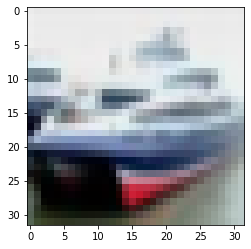

In [92]:
plt.imshow(X_test[1])

In [93]:
y_test[1]

array([8], dtype=uint8)

# Result

- We have predicted the Image as Ship since the y_test prediction indicates as 8 (Ship) in CIFAR Dataset.